# Explore here

In [1]:
#solucion 1 
from dotenv import load_dotenv
import os
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

load_dotenv()

#PASO 5

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

kendrick = "2YZyLoL8N0Wb9xBt1NhZWg"
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id,client_secret=client_secret))
results = spotify.artist_top_tracks(kendrick)

for track in results['tracks'][:10]:
    print(f'track    : {track["name"]}')
    print(f"popularity: {track['popularity']}")
    print(f"duration_ms: {track['duration_ms']}")
    print()

track    : luther (with sza)
popularity: 89
duration_ms: 177598

track    : Not Like Us
popularity: 92
duration_ms: 274192

track    : tv off (feat. lefty gunplay)
popularity: 90
duration_ms: 220690

track    : All The Stars (with SZA)
popularity: 90
duration_ms: 232186

track    : squabble up
popularity: 87
duration_ms: 157992

track    : 30 For 30 (with Kendrick Lamar)
popularity: 85
duration_ms: 278276

track    : HUMBLE.
popularity: 84
duration_ms: 177000

track    : Money Trees
popularity: 78
duration_ms: 386906

track    : peekaboo (feat. azchike)
popularity: 83
duration_ms: 155917

track    : Like That
popularity: 82
duration_ms: 267706



In [2]:
import pandas as pd

# Crear una lista para almacenar los datos de las canciones
tracks = []

# Iterar sobre las primeras 10 canciones en 'results['tracks']'
for track in results['tracks'][:10]:
    # Crear un diccionario con la información de la canción
    track_info = {
        "Track name": track["name"],  # Nombre de la canción
        "Popularity": track["popularity"],  # Popularidad de la canción
        "Duration (min)": track["duration_ms"] / 60000  # Duración en minutos
    }
    # Añadir el diccionario a la lista 'tracks'
    tracks.append(track_info)

# Crear el DataFrame a partir de la lista de diccionarios
df = pd.DataFrame(tracks)

# Ordenar el DataFrame por la columna "Popularity" de menor a mayor
df_sorted = df.sort_values(by="Popularity", ascending=True)

# Seleccionar las 3 canciones menos populares
top_3 = df_sorted.head(3)

# Mostrar el resultado
print(top_3)

                 Track name  Popularity  Duration (min)
7               Money Trees          78        6.448433
9                 Like That          82        4.461767
8  peekaboo (feat. azchike)          83        2.598617


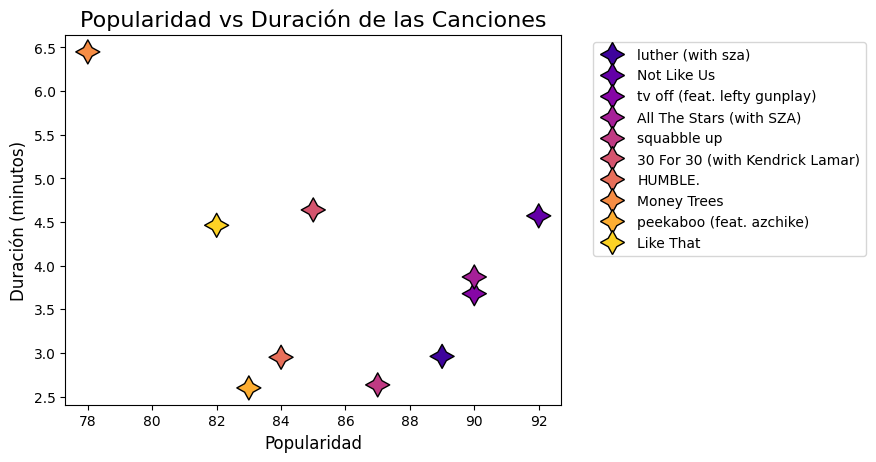

In [3]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.scatterplot(
    data=df,                   # DataFrame con los datos
    x='Popularity',            # Eje X: Popularidad
    y='Duration (min)',        # Eje Y: Duración en minutos
    hue='Track name',          # Color de los puntos según el nombre del track
    marker=(4, 1, 0),          # Marcador en forma de estrella
    s=300,                     # Tamaño de los marcadores
    palette='plasma',          # Paleta de colores para los puntos
    edgecolor='black',         # Borde de los marcadores en negro
    linewidth=1                # Grosor del borde
)

# Personalizar el gráfico
plt.title('Popularidad vs Duración de las Canciones', fontsize=16)
plt.xlabel('Popularidad', fontsize=12)
plt.ylabel('Duración (minutos)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Mover la leyenda fuera del gráfico

# Mostrar el gráfico
plt.show()